# Mini-Project: Building models and interpreting results

## Scenario
You are a data scientist working for a retail consumer good company that seeks to deepen its understanding of customer behaviour to enhance satisfaction and loyalty. Your client, a national retail chain, is keen to leverage its extensive customer loyalty data set to reveal the relationship between satisfaction levels and potential influencing factors, such as perceived product quality, price fairness, brand trust, community outreach efforts, and the impact of negative publicity.

Your primary goal is to develop a predictive model to help the client optimise its strategic initiatives in order to refine their marketing efforts, improve product offerings, optimise customer engagement, and drive growth and market share.


## Objective
The goal is to:
- review and reinforce key concepts related to regression analysis, including understanding coefficients and residuals
- explore the importance of evaluating regression models for their predictive power and the practical application of metrics like $R^2$, adjusted-$R^2$, and RSS.

## Assessment criteria
Evidence critical analysis of outputs to evaluate predictive models, accurately interpreting relevant metrics to ensure generalisability.


## Steps
1. Import the necessary libraries and load the data set.
2. Split the data set into features (`X`) and the target variable (`y`). In this case the variable 'Loyalty' is the target variable.
3. Check if there are any features that are not suitable or required to be included in the regression model.
3. Create a regression model using Python (utilise scikit-learn) to predict the target variable based on the features.
4. Calculate the $R^2$ and adjusted-$R^2$ values to assess the model's explanatory power.
5. Calculate the residual sum of squares (RSS) to quantify the model's error.
6. Experiment with different sets of independent variables or model configurations to see how it affects $R^2$, adjusted-$R^2$, and RSS.
7. Explore the data set, experiment with model configurations, and think critically about the practical implications of the findings.


In [ ]:
#Step 1: Import the libraries you need for this model.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Load the data.
data = pd.read_csv("https://raw.githubusercontent.com/nixzach/cam_dsb/main/Loyalty.csv")
data

,CustomerID,Loyalty,Price,Quality,Community Outreach,Trust,Customer satisfaction,Negative publicity
0,1525,6.145,10.00,0.87,-0.07,7.45,0.78,0.04
1,1531,6.033,10.00,0.93,0.14,7.62,0.90,0.05
2,1526,6.531,10.00,0.86,-0.02,7.48,0.85,0.06
3,1523,6.834,10.00,0.92,0.29,7.39,0.87,0.06
4,1524,6.642,10.00,0.85,0.05,7.42,0.66,0.07
...,...,...,...,...,...,...,...,...
1706,200,5.249,9.41,0.79,0.23,6.68,0.41,0.98
1707,414,5.385,10.00,0.79,-0.20,6.80,0.52,0.98
1708,1500,4.815,9.61,0.77,-0.18,6.63,0.44,0.98
1709,1005,5.467,10.00,0.93,-0.30,6.41,0.50,0.98


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1711 entries, 0 to 1710
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CustomerID             1711 non-null   int64  
 1   Loyalty                1711 non-null   float64
 2   Price                  1711 non-null   float64
 3   Quality                1711 non-null   float64
 4   Community Outreach     1711 non-null   float64
 5   Trust                  1711 non-null   float64
 6   Customer satisfaction  1711 non-null   float64
 7   Negative publicity     1711 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 107.1 KB


In [ ]:
#info around the data that we have
data.describe()

,CustomerID,Loyalty,Price,Quality,Community Outreach,Trust,Customer satisfaction,Negative publicity
count,1711.000000,1711.000000,1711.000000,1711.000000,1711.000000,1711.000000,1711.000000,1711.000000
mean,956.806546,5.445985,9.129760,0.810345,-0.000625,6.320374,0.739527,0.751163
std,562.449054,1.135628,0.941237,0.121453,0.162179,0.768282,0.142846,0.185918
min,1.000000,2.375000,6.680000,0.290000,-0.340000,3.230000,0.260000,0.040000
25%,468.500000,4.595000,8.390000,0.740000,-0.110000,5.820000,0.640000,0.700000
50%,968.000000,5.364000,9.460000,0.830000,-0.030000,6.510000,0.760000,0.810000
75%,1436.500000,6.254000,10.000000,0.910000,0.090000,6.860000,0.850000,0.870000
max,1949.000000,7.971000,10.000000,0.990000,0.690000,7.710000,0.990000,0.980000


In [ ]:
#checking there aren't any null values
data.isnull().sum()

,0
CustomerID,0
Loyalty,0
Price,0
Quality,0
Community Outreach,0
Trust,0
Customer satisfaction,0
Negative publicity,0


In [ ]:
# Split the data into features (X) and target variable (y)
#X = data.drop('Loyalty', axis=1)  # Features
X = data.drop(['Loyalty', 'CustomerID'], axis=1)
y = data['Loyalty']  # Target variable

print(X.head())


   Price  Quality  Community Outreach  Trust  Customer satisfaction  \
0   10.0     0.87               -0.07   7.45                   0.78   
1   10.0     0.93                0.14   7.62                   0.90   
2   10.0     0.86               -0.02   7.48                   0.85   
3   10.0     0.92                0.29   7.39                   0.87   
4   10.0     0.85                0.05   7.42                   0.66   

   Negative publicity  
0                0.04  
1                0.05  
2                0.06  
3                0.06  
4                0.07  


In [ ]:
print(y.head())

0    6.145
1    6.033
2    6.531
3    6.834
4    6.642
Name: Loyalty, dtype: float64


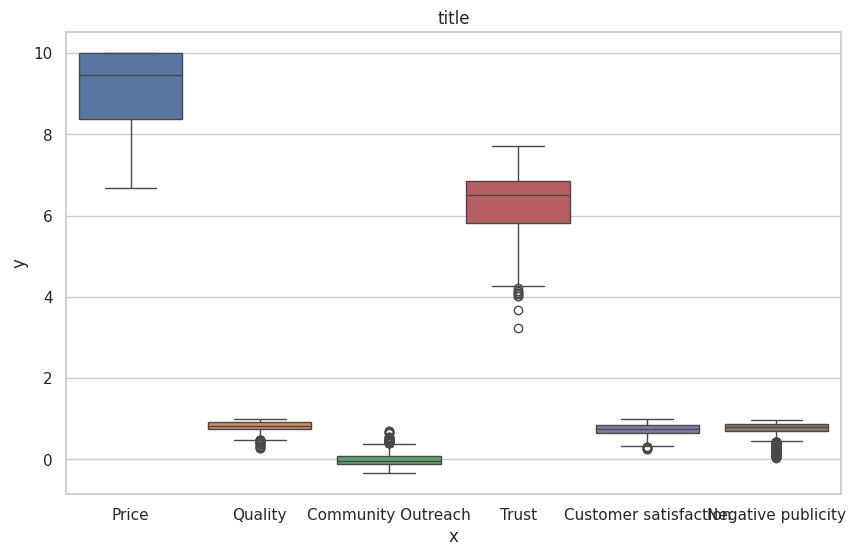

In [ ]:
# Set the style.
sns.set(style="whitegrid")

# Create the boxplot
plt.figure(figsize=(10, 6))
boxplot = sns.boxplot(data=X)

# Set title and labels.
boxplot.set_title('title')
boxplot.set_xlabel('x')
boxplot.set_ylabel('y')

# Display the plot.
plt.show()

Outliers in all but price, large IQR (and far outliers) for Trust epecially

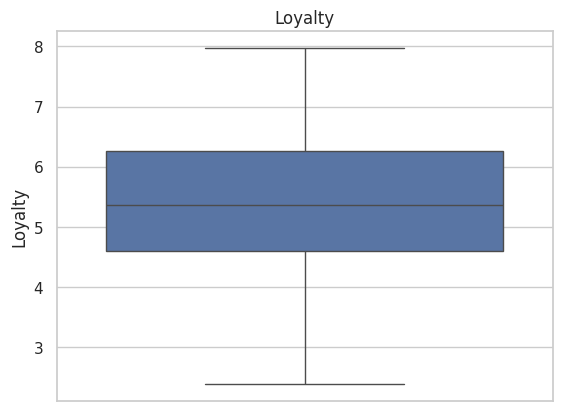

In [ ]:
# Create a boxplot.
sns.boxplot(y)

plt.title('Loyalty')
plt.show()

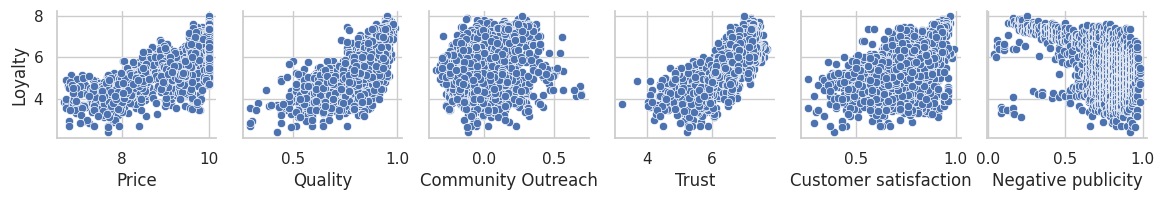

In [ ]:
sns.pairplot(data,
             x_vars=X.columns.tolist(),
             y_vars='Loyalty',
             height=2,
             aspect=1,
             kind='scatter')

plt.show()

Just off this, price, quality, trust, customer satisfaction and negative publicitiy seem to have some sort of bearing on loyalty. Community outreach looks less likely just at this first stage.


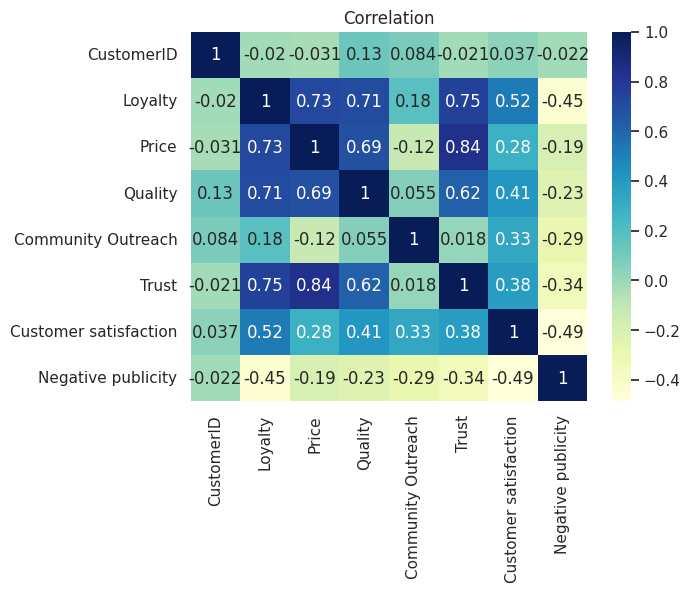

In [ ]:
sns.heatmap(data.corr(),
            cmap="YlGnBu",
            annot = True)

plt.title('Correlation')
plt.show()

In [ ]:
# Lets just try trust to start with



In [ ]:
import statsmodels.api as sm

# Add a constant to get an intercept.
X_sm = sm.add_constant(X)

# Fit the resgression line using 'OLS'.
lr = sm.OLS(y, X_sm).fit()

# Perform a summary operation that lists out all the different parameters of the regression line fitted.
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                Loyalty   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     814.0
Date:                Fri, 02 Aug 2024   Prob (F-statistic):               0.00
Time:                        21:12:10   Log-Likelihood:                -1488.1
No. Observations:                1711   AIC:                             2990.
Df Residuals:                    1704   BIC:                             3028.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -2.03


For this model, the equation is given as:

$ Loyalty = -2.0351 + 0.32901 \times Price + 2.5820 \times Quality + 0.7594 \times Community Outreach + 0.3741 \times Trust + 0.9951 \times Customer Satisfaction - 0.9529 \times Negative Publicity  $

Price has the lowest coefficient at 0.3 but that's still not negligible. Furthermore, no confidence bands contain zero and p-values are all zero. Let's consider all of these factores going forward.


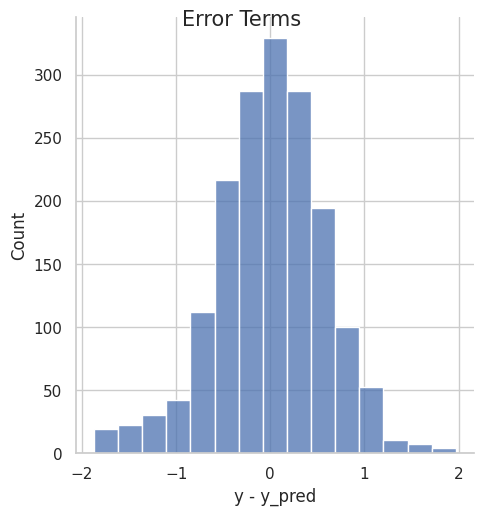

In [ ]:
# Check whether the error terms are normally distributed.
y_pred = lr.predict(X_sm)
res = (y - y_pred)

# Create a visualisation.
g = sns.displot(res, bins=15)
g.fig.suptitle('Error Terms', fontsize=15)
g.set_axis_labels('y - y_pred', 'Count')
plt.show()

Looks normally distributed


In [ ]:
# Import required libraries.
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

np.sqrt(mean_squared_error(y, y_pred))

0.5773964604551491

In [ ]:
# Determine the R-squared value (test data set).
r_squared = r2_score(y, y_pred)

# View the output.
r_squared

0.741339626806055

This means that all these parameters account for 74% of customer loyalty